In [1]:
import h5py
import numpy as np
import glob
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

/cluster/work/bewi/members/tuncel/anaconda3/envs/r-3.4.1-env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
loc_values = [0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3]

In [3]:
loc_values

[0.25, 0.5, 0.75, 1, 1.25, 1.5, 2, 2.5, 3]

In [4]:
h5f = h5py.File('../simulated/from_raw_counts/melanomaS2_sim_loc1.h5', 'r')

In [7]:
list(h5f.keys())

['gene_names', 'cell_names', 'matrix', 'cells_on_rows', 'cell_groups']

In [8]:
type(h5f['cell_groups'].value)

numpy.ndarray

In [9]:
str1 = '../simulated/from_raw_counts/analysis/block_zifa/clusters/melanomaS2_sim_loc0.5clusters.csv'

In [10]:
str1.split

<function str.split>

In [11]:
def evaluate_once(loc_value):
    loom_file_path =  '../simulated/from_raw_counts/melanomaS2_sim_loc'+str(loc_value)+'.h5'
    dim_red_results_path = sorted(glob.glob('../simulated/from_raw_counts/analysis/*/melanomaS2_sim_loc'+str(loc_value)+'.csv'))
    cluster_results_path = sorted(glob.glob('../simulated/from_raw_counts/analysis/*/clusters/melanomaS2_sim_loc'+str(loc_value)+'clusters.csv'))
    h5f = h5py.File(loom_file_path, 'r')
    cell_groups = h5f['cell_groups'].value
    h5f.close()
    vfunc1 = np.vectorize(lambda t: t.decode('UTF-8'))
    cell_groups = vfunc1(cell_groups)
    vfunc2 = np.vectorize(lambda t: int(t[-1:]))
    cell_groups = vfunc2(cell_groups)
    # cluster results
    cluster_results = []
    for c in cluster_results_path:
        cluster_results.append(np.genfromtxt(c, delimiter=',', dtype=np.int64))   

    results = []
    i = 0
    for cr in cluster_results:
        #print (cluster_results_path[i])
        #print ('nmi')
        i = i + 1
        #print(normalized_mutual_info_score(cell_groups, cr))
        results.append(normalized_mutual_info_score(cell_groups, cr))
    #print(cluster_results_path)
    vfunc2 = np.vectorize(lambda t: t.split('/')[4])
    index_list = vfunc2(cluster_results_path)
    print(index_list)
    return pd.Series(results, index=index_list)

In [12]:
index = evaluate_once(0.5).T.index.values

['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']


In [13]:
df = pd.DataFrame(columns=index)
for loc in loc_values:
    df.loc[loc] = evaluate_once(loc)
    #df.append(evaluate_once(loc),ignore_index=True)

['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']
['block_zifa' 'factor_analysis' 'griph' 'pca' 'phenograph' 'simlr' 'tsne']


 ### results 1

In [14]:
df

,block_zifa,factor_analysis,griph,pca,phenograph,simlr,tsne
0.25,0.223112,0.009885,0.005040,0.067756,0.009378,0.009048,0.043198
0.50,0.619962,0.009885,0.006055,0.230594,0.199890,0.056528,0.151931
0.75,0.894941,0.010231,0.218964,0.414174,0.679268,0.484780,0.552289
1.00,0.980674,0.900939,0.515688,0.909232,0.891068,0.787362,0.853184
1.25,1.000000,0.997176,0.667645,0.997176,0.981348,0.950066,0.971125
1.50,1.000000,0.997176,0.707471,0.997176,0.992034,0.994367,0.991543
2.00,1.000000,1.000000,0.740851,1.000000,1.000000,1.000000,1.000000
2.50,1.000000,1.000000,0.741459,1.000000,1.000000,1.000000,1.000000
3.00,1.000000,1.000000,0.738901,1.000000,1.000000,1.000000,0.997176


NameError: name 'df' is not defined

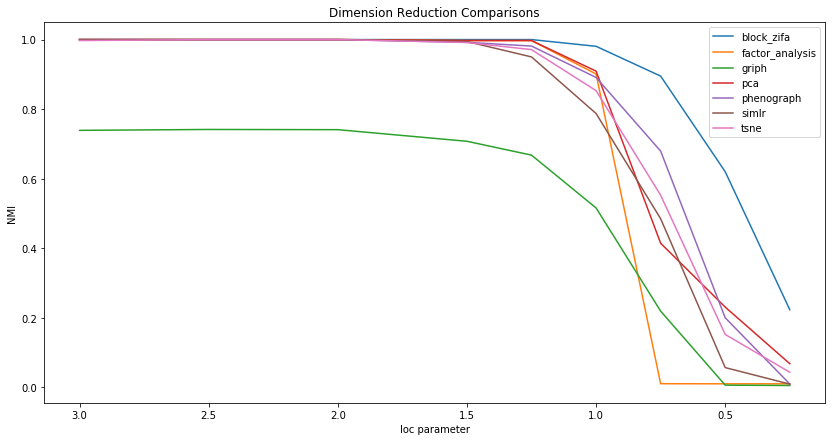

In [15]:
ax = df.plot(title='Dimension Reduction Comparisons',figsize=(14,7))
ax.set_xlabel('loc parameter')
ax.set_ylabel('NMI')
ax.invert_xaxis()

In [ ]:
pd.write

In [1]:
2

2

In [3]:
22

22

In [2]:
33

33